In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline


In [167]:
file_path = 'C:/Users/hp/Desktop/Data Analytics/Assignments/Python/Python Foundation Case Study 2 - Credit Card Case Study_A3/'
cust_acq = pd.read_csv( file_path + 'Customer Acquisition.csv')
repay = pd.read_csv( file_path + 'Repayment.csv')
spend = pd.read_csv( file_path + 'Spend.csv')

BUSINESS PROBLEM:
In order to effectively produce quality decisions in the modern credit card industry, knowledge 
must be gained through effective data analysis and modeling. Through the use of dynamic datadriven decision-making tools and procedures, information can be gathered to successfully evaluate 
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries 
across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and 
collections, respond to customer requests for help with proactive offers and service.


DATA AVAILABLE -
This book has the following sheets:
Customer Acquisition: At the time of card issuing, company maintains the details of customers.
Spend (Transaction data): Credit card spend for each customer
Repayment: Credit card Payment done by customer

Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the 
customers spend & repayment behavior.

In [168]:
cust_acq.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [169]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [170]:
cust_acq.rename( columns = {'No': 'Sl_no'}, inplace = True )

In [171]:
cust_acq.isnull().sum()

Sl_no       0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [172]:
repay.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [173]:
repay.rename( columns = {'SL No:': 'Sl_no'}, inplace = True )

In [174]:
repay.loc[0,'Sl_no']=1

In [175]:
repay.drop( columns = ['Unnamed: 4'], inplace = True )

In [176]:
repay

,Sl_no,Customer,Month,Amount
0,1.0,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1518,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN


In [177]:
repay.dropna( axis = 0, inplace =True)

In [178]:
repay.Sl_no=repay.Sl_no.astype('int64')

In [179]:
repay.isnull().sum()

Sl_no       0
Customer    0
Month       0
Amount      0
dtype: int64

In [180]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl_no     1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


In [181]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [182]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [183]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [184]:
spend.rename( columns = {'Sl No:': 'Sl_no'}, inplace = True )

In [185]:
cust_acq.head(1)

,Sl_no,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [186]:
spend.head()

,Sl_no,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [187]:
cust_sp = pd.merge( left = cust_acq, right = spend, how = 'inner', on = 'Customer')

In [188]:
cust_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl_no_x   1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Age       1500 non-null   int64  
 3   City      1500 non-null   object 
 4   Product   1500 non-null   object 
 5   Limit     1500 non-null   float64
 6   Company   1500 non-null   object 
 7   Segment   1500 non-null   object 
 8   Sl_no_y   1500 non-null   int64  
 9   Month     1500 non-null   object 
 10  Type      1500 non-null   object 
 11  Amount    1500 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 152.3+ KB


In [189]:
cust_sp.head()

,Sl_no_x,Customer,Age,City,Product,Limit,Company,Segment,Sl_no_y,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [190]:
cust_rp = pd.merge( left = cust_acq, right = repay, how = 'inner',on = 'Customer')

In [191]:
cust_rp.rename( columns = {'Amount': 'repay_amt','Month':'repay_date'}, inplace = True )

In [192]:
cust_sp.rename( columns = {'Amount': 'spend_amt','Month':'spend_date'}, inplace = True )

In [193]:
cust_sp['spend_date'] = pd.to_datetime(cust_sp['spend_date'])

In [194]:
cust_rp['repay_date'] = pd.to_datetime(cust_rp['repay_date'])

In [195]:
cust_rp.head()

,Sl_no_x,Customer,Age,City,Product,Limit,Company,Segment,Sl_no_y,repay_date,repay_amt
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88


In [196]:
cust_sp.head()

,Sl_no_x,Customer,Age,City,Product,Limit,Company,Segment,Sl_no_y,spend_date,Type,spend_amt
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


1. In the above dataset,
 a. In case age is less than 18, replace it with mean of age values.
 b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)
 c. Incase the repayment amount is more than the limit, replace the repayment with the 
limit.

 a. In case age is less than 18, replace it with mean of age values.

In [197]:
cust_rp['Age'] = pd.Series( np.where( cust_rp.Age <18, 
                             cust_rp.Age.mean(),cust_rp.Age )).astype(int)

In [198]:
cust_sp['Age'] = pd.Series( np.where( cust_sp.Age <18, 
                             cust_sp.Age.mean(),cust_sp.Age )).astype(int)

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [199]:
cust_sp['spend_amt'] = pd.Series( np.where( cust_sp.spend_amt > cust_sp.Limit, 
                            cust_sp.Limit*0.5,cust_sp.spend_amt))

c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [200]:
cust_rp['repay_amt'] = pd.Series( np.where( cust_rp.repay_amt > cust_rp.Limit, 
                            cust_rp.Limit,cust_rp.repay_amt))

2. From the above dataset create the following summaries:
 a. How many distinct customers exist?
 b. How many distinct categories exist?
 c. What is the average monthly spend by customers?
 d. What is the average monthly repayment by customers?
 e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)
f. What are the top 5 product types?
 g. Which city is having maximum spend?
 h. Which age group is spending more money?
i. Who are the top 10 customers in terms of repayment?

a. How many distinct customers exist

In [201]:
cust_acq.duplicated().sum()

0

In [202]:
cust_acq.Customer.unique().shape[0]

100

b. How many distinct categories exist?

In [203]:
cust_acq.Product.unique().shape[0]

3

c. What is the average monthly spend by customers?

In [204]:
cust_sp['year_0'] = pd.DatetimeIndex(cust_sp.spend_date).year
cust_sp['month_0'] = pd.DatetimeIndex(cust_sp.spend_date).month

In [205]:
cust_sp.groupby(['year_0','month_0'])[['spend_amt']].sum().head(10)

spend_amt
year_0 month_0             
2004   1        44279811.96
       2         3835951.84
       3         1871913.27
       4         3489415.34
       5         2146577.36
       9         2402109.69
       11        1114989.10
2005   1         5383606.78
       2        25928183.21
       4         4100065.73

In [206]:
cust_sp.groupby(['year_0','month_0'])[['spend_amt']].sum().mean().round(2)

spend_amt    7326036.17
dtype: float64

d. What is the average monthly repayment by customers?

In [207]:
cust_rp['year_0'] = pd.DatetimeIndex(cust_rp.repay_date).year
cust_rp['month_0'] = pd.DatetimeIndex(cust_rp.repay_date).month

In [208]:
cust_rp.groupby(['year_0','month_0'])[['repay_amt']].sum().mean().round(2)

repay_amt    8166078.67
dtype: float64

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend.
 Interest is earned only on positive profits and not on negative amounts) 

In [209]:
monthly_sp = cust_sp.groupby(['year_0','month_0'])[['spend_amt']].sum()

In [210]:
monthly_rp = cust_rp.groupby(['year_0','month_0'])[['repay_amt']].sum()

In [211]:
monthly_sp['repay_amt']=monthly_rp

In [212]:
monthly_sp['monthly_profit']= monthly_sp.repay_amt - monthly_sp.spend_amt

In [213]:
monthly_sp['interest_earned'] = np.where( monthly_sp.monthly_profit >0,monthly_sp.monthly_profit*0.029,0).round(2)

In [214]:
monthly_sp

spend_amt    repay_amt  monthly_profit  interest_earned
year_0 month_0                                                           
2004   1        44279811.96  44792020.72       512208.76         14854.05
       2         3835951.84   3391537.65      -444414.19             0.00
       3         1871913.27   2666519.22       794605.95         23043.57
       4         3489415.34   5268979.74      1779564.40         51607.37
       5         2146577.36   3782759.91      1636182.55         47449.29
       9         2402109.69   1902816.41      -499293.28             0.00
       11        1114989.10   1788398.63       673409.53         19528.88
2005   1         5383606.78   4894040.25      -489566.53             0.00
       2        25928183.21  25491800.20      -436383.01             0.00
       4         4100065.73   3634903.56      -465162.17             0.00
       5        21647612.42  30818764.69      9171152.27        265963.42
       6         8010511.98   3493885.53     -4516626.45             0.00
       7         1691243.28   1799339.14       108095.86          3134.78
       8         3967808.19   5549411.88      1581603.69         45866.51
       9         1531932.87    882719.54      -649213.33             0.00
       10        1258311.90   1635219.22       376907.32         10930.31
       11        7481048.89   7107487.13      -373561.76             0.00
       12        1181824.00   2149428.61       967604.61         28060.53
2006   1         1908375.22   2453064.46       544689.24         15795.99
       2         6236117.45   7339728.53      1103611.08         32004.72
       3        28583302.72  31591837.84      3008535.12         87247.52
       4        12665908.03  16247638.94      3581730.91        103870.20
       5         8046846.48  14900517.86      6853671.38        198756.47
       6         2183600.98   1985148.84      -198452.14             0.00
       7         5294483.07   6295652.89      1001169.82         29033.92
       8         2994094.85   1938641.97     -1055452.88             0.00
       9         1993489.03   2388294.79       394805.76         11449.37
       10        2410188.02   2447635.07        37447.05          1085.96
       11        4039950.52   3930259.60      -109690.92             0.00
       12        2101811.05   2413907.27       312096.22          9050.79

f. What are the top 5 product types?

In [215]:
cust_sp.groupby(by='Type').spend_amt.agg(['sum']).sort_values( by ='sum',ascending = False).head(5)

,sum
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


g. Which city is having maximum spend?

In [216]:
cust_sp.groupby(by='City').spend_amt.agg(['sum']).sort_values( by ='sum',ascending = False).head(1)

,sum
City,
COCHIN,45963513.5


h. Which age group is spending more money

In [217]:
cust_sp.groupby(by='Age').spend_amt.agg(['sum']).sort_values( by ='sum',ascending = False).head(1)

,sum
Age,
44,24874877.77


i. Who are the top 10 customers in terms of repayment?

In [218]:
cust_rp.groupby(by='Customer').repay_amt.agg(['sum']).sort_values( by ='sum',ascending = False).head(10)

,sum
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [219]:
cust_sp.head(1)

,Sl_no_x,Customer,Age,City,Product,Limit,Company,Segment,Sl_no_y,spend_date,Type,spend_amt,year_0,month_0
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,1


In [220]:
city_wise_sp = pd.pivot_table(data = cust_sp,index ='City', columns = ['Product','year_0'], values = 'spend_amt').round(2)
city_wise_sp

Product          Gold                         Platimum                        \
year_0           2004       2005       2006       2004       2005       2006   
City                                                                           
BANGALORE   258052.18  222282.12  240612.22   38370.08   29428.55   26378.13   
BOMBAY      291160.56  230333.80  203003.70   35890.60   32354.77   31359.03   
CALCUTTA    219915.91  257583.90  253807.56   88595.23  123186.01   87551.38   
CHENNAI     176603.08  311745.47  245844.42  186086.97  157936.14  167497.45   
COCHIN      215172.06  263274.20  233314.28  106872.00  112748.22   98411.85   
DELHI       215884.23  178622.30  268827.57   47252.15   54906.43   58929.57   
PATNA       296081.13  271051.31  206925.61  371023.20  360403.88  179448.24   
TRIVANDRUM  241510.28  177196.55  273571.09  144111.78  120048.11  119300.21   

Product       Silver                      
year_0          2004      2005      2006  
City                                      
BANGALORE   53827.19  46145.13  52425.22  
BOMBAY      48371.73  46271.69  84064.14  
CALCUTTA    50000.60  55018.38  77197.09  
CHENNAI     56411.37  47148.06  50001.36  
COCHIN      50889.35  50174.57  70555.05  
DELHI       48010.77  55664.66  50288.23  
PATNA       47292.76  47504.71  50000.36  
TRIVANDRUM  41933.50  44985.50  50532.92

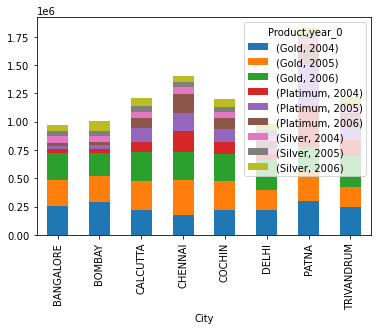

In [221]:
city_wise_sp.plot(kind='bar',stacked=True)
plt.show()

4. Create graphs for
 a. Monthly comparison of total spends, city wise
 b. Comparison of yearly spend on air tickets
 c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

a. Monthly comparison of total spends, city wise

In [222]:
monthly_citywise_sp = pd.pivot_table(data = cust_sp,index ='City', columns = ['month_0'], values = 'spend_amt').round(2)
monthly_citywise_sp

month_0,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,134952.19,140301.97,109447.00,168319.22,141847.00,147853.99,185684.81,99294.56,140603.66,136450.33,132976.65,60309.61
BOMBAY,138348.68,122199.67,130696.26,89227.86,149690.22,146574.37,59242.11,213348.95,213067.13,112667.62,151160.49,46680.24
CALCUTTA,156290.77,194060.61,145265.88,138300.32,169037.78,229304.58,248285.92,172039.34,151171.36,98178.92,122287.11,27500.75
CHENNAI,148898.71,182742.33,198977.73,148156.29,150326.30,207373.69,173456.44,152937.98,149151.88,156247.17,269555.86,223628.27
COCHIN,162699.63,130633.78,122720.58,138669.46,164527.14,249574.51,143433.03,257478.51,115186.91,144758.65,208533.31,129933.29
DELHI,100528.20,135824.01,141696.81,70658.25,114308.72,127819.02,50001.50,51800.72,50001.00,64615.46,97902.74,210585.50
PATNA,175578.77,156888.90,95811.11,259797.73,152613.34,124364.36,50000.00,104845.91,70329.95,164768.67,206838.94,50000.00
TRIVANDRUM,154347.37,150374.94,159487.77,85663.82,148080.76,133445.61,86828.17,151257.98,93031.85,142790.96,28677.48,213640.75


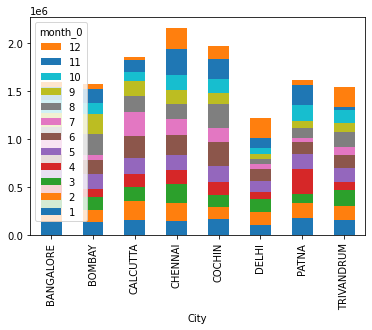

In [223]:
monthly_citywise_sp.plot(kind='bar',stacked=True,legend= 'reverse')
plt.show()

b. Comparison of yearly spend on air tickets

In [224]:
yearly_airtickets_sp = cust_sp.loc[cust_sp.Type == 'AIR TICKET' ].groupby('year_0')[['spend_amt']].sum()
yearly_airtickets_sp

,spend_amt
year_0,
2004,4357225.35
2005,10550152.21
2006,5248469.56


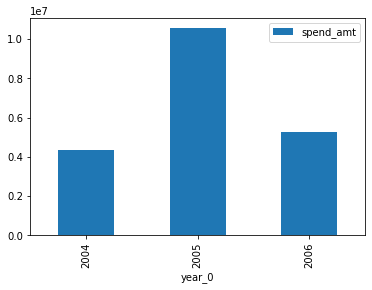

In [225]:
yearly_airtickets_sp.plot(kind='bar')
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [226]:
monthly_prd_sp = pd.pivot_table(data = cust_sp, index = 'Product', columns='month_0', 
               values='spend_amt', aggfunc='sum')
monthly_prd_sp

month_0,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


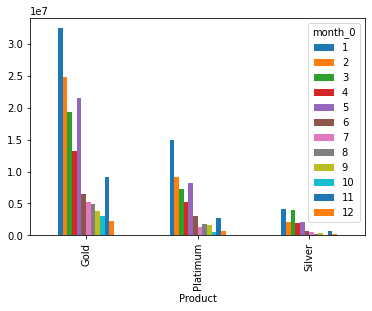

In [227]:
monthly_prd_sp.plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Product'>

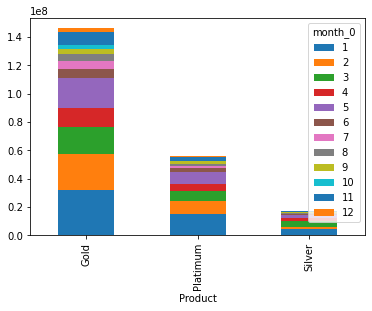

In [228]:
monthly_prd_sp1= pd.pivot_table(data = cust_sp, index = 'Product', columns='month_0',values='spend_amt', aggfunc='sum').plot(kind='bar',stacked=True)
monthly_prd_sp1

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers

In [229]:
cust_rp['monthly'] = cust_rp['repay_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_rp['yearly'] = cust_rp['repay_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [230]:
def top10_cust(product_cat,time_period):
    return cust_rp.loc[(cust_rp.Product == product_cat)].groupby(['Customer','City','Product',time_period]).repay_amt.sum().reset_index().sort_values('repay_amt',ascending=False).head(10)

In [231]:
product_cat=str(input('Enter Product Category (Gold/Silver/Platinum): '))
time_period=str(input('Enter Time Period (yearly/monthly): '))
top10_Customers=top10_cust(product_cat,time_period)
top10_Customers

Enter Product Category (Gold/Silver/Platinum): Silver
Enter Time Period (yearly/monthly): yearly


,Customer,City,Product,yearly,repay_amt
14,A24,DELHI,Silver,2005,1184870.98
8,A22,BOMBAY,Silver,2005,1141542.81
20,A46,PATNA,Silver,2005,1116730.89
18,A25,COCHIN,Silver,2006,1000030.00
11,A23,BANGALORE,Silver,2005,1000010.00
22,A57,TRIVANDRUM,Silver,2004,1000010.00
7,A22,BOMBAY,Silver,2004,953419.47
9,A22,BOMBAY,Silver,2006,945271.83
12,A23,BANGALORE,Silver,2006,872925.32
21,A46,PATNA,Silver,2006,839228.07
